In [48]:
%matplotlib inline
from modsim import *

In [49]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton
degrees = UNITS.degree

In [50]:
condition = Condition(mass = 26 ,
                g = 9.8 ,
                k = 6567 ,
                v_init= 0,
                y_init = 3 ,
                duration=10 ,
                dt=21 ,
                y_attach=0,
                length = 0.15)

Phase 1

In [51]:
def make_system(condition):
    unpack(condition)
    
    init = State(y=y_init, v = v_init)
    ts = linspace(0,duration, dt)
    
    return System(init=init, g=g, mass=mass, y_attach=y_attach, k=k, ts=ts)

In [52]:
system=make_system(condition)
system

,value
init,y 3.0 v 0.0 dtype: float64
g,9.8
mass,26
y_attach,0
k,6567
ts,"[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ..."


In [53]:
def slope_func1(state, t, system):
    """Slope function for when the pogo stick is falling from the set height, currently it is at 3m
        AKA PHASE 1, runs until the spring hits the ground, before the spring begins to compress
    """
    
    y, v = state
    unpack(system)
    
    dvdt = -g
    dydt = v
    
    return dydt, dvdt

In [54]:
slope_func1(system.init, 0, system)

(0.0, -9.8000000000000007)

In [55]:
run_odeint(system, slope_func1)


In [56]:
y= system.results.y
T=interp_inverse(y)

In [57]:
T_phase1=T(0)
T_phase1

array(0.7414965984408527)

In [58]:
#creating a new system and running a new simulation that stops when the spring hits the ground

condition.set(duration=T_phase1)
system = make_system(condition = condition)
run_odeint(system, slope_func1)

In [59]:
def final_falling_state(system):
    """returns the velocity and position 
    the instant that the spring touches the ground """
    
    t_end= system.results.index[-1]
    y, v = system.results.loc[t_end]
    return y, v

In [60]:
y_final, v_final = final_falling_state(system)
y_final

0.30589569287584029

In [61]:
v_final

-7.2666666647203559

In [62]:
def plot_position(results):
    
    newfig()
    plot (results.y, label='y')
    
    decorate(xlabel="Time(s)",
             ylabel = "Position(m)")

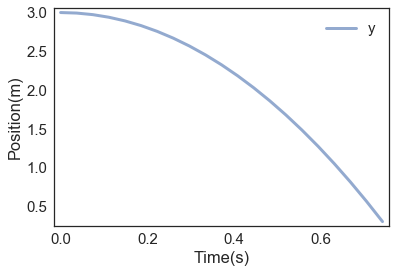

In [63]:
plot_position(system.results)

In [74]:
time=0.1
F_s = length*k
a_s=F_s/mass
v_s = a_s*time

In [75]:
condition2 = Condition(mass = 26 ,
                g = 9.8 ,
                k = 6567 ,
                v_init= v_s,
                y_init = 0 ,
                duration=10 ,
                dt=21 ,
                y_attach=0,
                length = 0.15)

In [78]:
def make_system2(condition):
    unpack(condition)
    
    init = State(y=y_init, v = v_init)
    ts = linspace(T_phase1, T_phase1+9, 101)
    
    return System(init=init, g=g, mass=mass, y_attach=y_attach, k=k, ts=ts)

Phase 2

In [79]:
system2 = make_system2(condition2)

In [66]:
def spring_force_v(y, y_attach, length, k):
    x = abs(y-length+y_attach)
    F_s = k*x
    return F_s

In [80]:
def slope_func2(state, t, system):
    """Slope function for when the pogo stick is uncompressing
    """
    y, v = state
    unpack(system)
    
    dvdt = a_s
    dydt = v
    
    return dydt, dvdt

In [85]:
run_odeint(system2, slope_func1)


In [86]:
system2.results

,y,v
0.741497,0.000000,3.788654
0.831497,0.301289,2.906654
0.921497,0.523198,2.024654
1.011497,0.665727,1.142654
1.101497,0.728875,0.260654
1.191497,0.712644,-0.621346
1.281497,0.617033,-1.503346
1.371497,0.442042,-2.385346
1.461497,0.187671,-3.267346
1.551497,-0.146080,-4.149346
